### Process One Image to Extract the Digital Numbers for Each Pixel ###

In [1]:
## This code is designed to extract thermal data from a file using ExifTool and perform basic analysis on the extracted data.
import os
import subprocess
import numpy as np

# File path to the thermal image
file_path = r"C:/ThermalData/DJI_20241218093726_0009_T.jpg"

# Path to the ExifTool executable
exiftool_path = r"C:/Program Files/exiftool-13.08_64/exiftool.exe"

# Check if the file exists before proceeding
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

# Check if the ExifTool executable exists
if not os.path.exists(exiftool_path):
    raise FileNotFoundError(f"ExifTool not found at: {exiftool_path}")

# Function to extract thermal data
def extract_thermal_data_with_exiftool(file_path):
    """
    Extracts thermal data from a file using ExifTool and performs basic analysis.
    :param file_path: Path to the file (e.g., RJPEG or TIFF).
    :return: A dictionary with analysis results.
    """
    try:
        # Run ExifTool to extract the thermal data
        # Note: The tag "-ThermalData" is used here as it matches the metadata in the file.
        result = subprocess.run(
            [exiftool_path, "-b", "-ThermalData", file_path],
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE
        )

        # Check if ExifTool returned an error
        if result.returncode != 0:
            raise ValueError(f"ExifTool error: {result.stderr.decode('utf-8')}")

        # Ensure the output is not empty
        # If no data is extracted, it means the file does not contain the ThermalData tag.
        if not result.stdout:
            raise ValueError("No thermal data extracted. Check if the file contains the ThermalData tag.")

        # Convert the thermal data to a NumPy array
        # The data is expected to be in 16-bit unsigned integer format.
        thermal_data = np.frombuffer(result.stdout, dtype=np.uint16)

        # Reshape the data into a 2D array
        # The dimensions (640x512) are typical for DJI thermal images. Adjust if necessary.
        width, height = 640, 512
        try:
            thermal_data = thermal_data.reshape((height, width))
        except ValueError as e:
            raise ValueError(f"Error reshaping thermal data: {e}")

        # Analyze the thermal data
        # Calculate basic statistics: minimum, maximum, mean, and standard deviation.
        min_temp = np.min(thermal_data)
        max_temp = np.max(thermal_data)
        mean_temp = np.mean(thermal_data)
        std_dev_temp = np.std(thermal_data)

        # Return the analysis results as a dictionary
        return {
            "min_temperature": min_temp,  # Minimum temperature in the image
            "max_temperature": max_temp,  # Maximum temperature in the image
            "mean_temperature": mean_temp,  # Mean temperature in the image
            "std_dev_temperature": std_dev_temp,  # Standard deviation of the temperatures
            "thermal_data": thermal_data  # The raw thermal data array
        }

    except Exception as e:
        # Handle any errors that occur during the process
        # Print the error message and return None to indicate failure.
        print(f"Error extracting thermal data: {e}")
        return None

# Call the extraction function
results = extract_thermal_data_with_exiftool(file_path)

# Check if results were returned
if results:
    # If results are available, print the thermal data analysis.
    print("Thermal Data Analysis:")
    for key, value in results.items():
        print(f"{key}: {value}")
else:
    # If no results were returned, print a message indicating failure.
    print("No results returned from the function.")

Thermal Data Analysis:
min_temperature: 17784
max_temperature: 18188
mean_temperature: 18066.85988769531
std_dev_temperature: 47.66152068586303
thermal_data: [[17980 17976 17964 ... 17940 17936 17936]
 [17976 17980 17968 ... 17936 17932 17936]
 [17980 17984 17976 ... 17936 17936 17936]
 ...
 [18108 18104 18100 ... 18096 18104 18096]
 [18100 18096 18096 ... 18104 18100 18100]
 [18096 18096 18096 ... 18108 18104 18108]]


### Process a Directory to Extract the Digital Numbers for Each Pixel ###

In [2]:

# Directory path containing the thermal images
directory_path = r"C:/ThermalData"

# Check if the directory exists before proceeding
if not os.path.exists(directory_path):
    raise FileNotFoundError(f"Directory not found: {directory_path}")

# Function to process all files in the directory
def process_directory(directory_path):
    """Processes all files in the given directory and extracts thermal data."""
    results_list = []
    for file_name in os.listdir(directory_path):
        file_path = os.path.join(directory_path, file_name)

        # Skip if it's not a file
        if not os.path.isfile(file_path):
            continue

        print(f"Processing file: {file_name}")
        results = extract_thermal_data_with_exiftool(file_path)

        if results:
            results["file_name"] = file_name  # Add the file name to the results
            results_list.append(results)
        else:
            print(f"Failed to process file: {file_name}")

    return results_list

# Call the directory processing function
all_results = process_directory(directory_path)

# Print the results for all files
if all_results:
    print("\nThermal Data Analysis for All Files:")
    for result in all_results:
        print(f"\nFile: {result['file_name']}")
        for key, value in result.items():
            if key != "file_name" and key != "thermal_data":  # Skip raw data for readability
                print(f"{key}: {value}")
else:
    print("No results returned for any files.")


Processing file: DJI_20241217092634_0001_T.JPG
Processing file: DJI_20241217092642_0002_T.JPG
Processing file: DJI_20241217092642_0002_T.JPG
Processing file: DJI_20241217092838_0003_T.JPG
Processing file: DJI_20241217092838_0003_T.JPG
Processing file: DJI_20241217092845_0004_T.JPG
Processing file: DJI_20241217092845_0004_T.JPG
Processing file: DJI_20241217092856_0005_T.JPG
Processing file: DJI_20241217092856_0005_T.JPG
Processing file: DJI_20241217092904_0006_T.JPG
Processing file: DJI_20241217092904_0006_T.JPG
Processing file: DJI_20241217092913_0007_T.JPG
Processing file: DJI_20241217092913_0007_T.JPG
Processing file: DJI_20241217092942_0008_T.JPG
Processing file: DJI_20241217092942_0008_T.JPG
Processing file: DJI_20241217092947_0009_T.JPG
Processing file: DJI_20241217092947_0009_T.JPG
Processing file: DJI_20241217093109_0012_T.JPG
Processing file: DJI_20241217093109_0012_T.JPG
Processing file: DJI_20241217093111_0013_T.JPG
Processing file: DJI_20241217093111_0013_T.JPG
Processing fi

### Process a Directory to Extract the Digital Numbers for Each Pixel, then Produce Grayscale Images by Normalising Digital Numbers ###

In [3]:
from PIL import Image  # Import the PIL library to save images

# Function to save thermal data as a grayscale image
def save_thermal_data_as_image(thermal_data, output_path):
    """Saves the thermal data as a grayscale image."""
    try:
        # Normalize the thermal data to the range 0-255 for image representation
        normalized_data = ((thermal_data - np.min(thermal_data)) / (np.max(thermal_data) - np.min(thermal_data)) * 255).astype(np.uint8)
        
        # Create a PIL image from the normalized data
        image = Image.fromarray(normalized_data)
        
        # Save the image to the specified output path
        image.save(output_path)
        print(f"Thermal data saved as image: {output_path}")
    except Exception as e:
        print(f"Error saving thermal data as image: {e}")

# Modify the process_directory function to save thermal data as images
def process_directory_and_save_images(directory_path, output_directory):
    """Processes all files in the given directory, extracts thermal data, and saves it as images."""
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)  # Create the output directory if it doesn't exist

    results_list = []
    for file_name in os.listdir(directory_path):
        file_path = os.path.join(directory_path, file_name)

        # Skip if it's not a file
        if not os.path.isfile(file_path):
            continue

        print(f"Processing file: {file_name}")
        results = extract_thermal_data_with_exiftool(file_path)

        if results:
            results["file_name"] = file_name  # Add the file name to the results
            results_list.append(results)

            # Save the thermal data as an image
            output_path = os.path.join(output_directory, f"{os.path.splitext(file_name)[0]}_8bit.png")
            save_thermal_data_as_image(results["thermal_data"], output_path)
        else:
            print(f"Failed to process file: {file_name}")

    return results_list

# Specify the output directory for thermal images
output_directory = r"C:/ThermalData/Processed"

# Call the directory processing function and save images
all_results = process_directory_and_save_images(directory_path, output_directory)

# Print the results for all files
if all_results:
    print("\nThermal Data Analysis for All Files:")
    for result in all_results:
        print(f"\nFile: {result['file_name']}")
        for key, value in result.items():
            if key != "file_name" and key != "thermal_data":  # Skip raw data for readability
                print(f"{key}: {value}")
else:
    print("No results returned for any files.")


Processing file: DJI_20241217092634_0001_T.JPG
Thermal data saved as image: C:/ThermalData/Processed\DJI_20241217092634_0001_T_8bit.png
Processing file: DJI_20241217092642_0002_T.JPG
Thermal data saved as image: C:/ThermalData/Processed\DJI_20241217092634_0001_T_8bit.png
Processing file: DJI_20241217092642_0002_T.JPG
Thermal data saved as image: C:/ThermalData/Processed\DJI_20241217092642_0002_T_8bit.png
Processing file: DJI_20241217092838_0003_T.JPG
Thermal data saved as image: C:/ThermalData/Processed\DJI_20241217092642_0002_T_8bit.png
Processing file: DJI_20241217092838_0003_T.JPG
Thermal data saved as image: C:/ThermalData/Processed\DJI_20241217092838_0003_T_8bit.png
Processing file: DJI_20241217092845_0004_T.JPG
Thermal data saved as image: C:/ThermalData/Processed\DJI_20241217092838_0003_T_8bit.png
Processing file: DJI_20241217092845_0004_T.JPG
Thermal data saved as image: C:/ThermalData/Processed\DJI_20241217092845_0004_T_8bit.png
Processing file: DJI_20241217092856_0005_T.JPG
T

### Process a Directory to Extract the Digital Numbers for Each Pixel, then Produce Grayscale Images without Normalising Digital Numbers ###

In [4]:
from PIL import Image  # Import the PIL library to save images

# Function to save thermal data as a grayscale image
def save_thermal_data_as_image(thermal_data, output_path):
    """Saves the thermal data as a grayscale image without normalization."""
    try:
        # Convert the thermal data to an 8-bit unsigned integer format
        # This assumes the thermal data is already in a suitable range for grayscale representation
        image = Image.fromarray(thermal_data.astype(np.uint16))  # Save as 16-bit grayscale image
        
        # Save the image to the specified output path
        image.save(output_path)
        print(f"Thermal data saved as image: {output_path}")
    except Exception as e:
        print(f"Error saving thermal data as image: {e}")

# Modify the process_directory function to save thermal data as images
def process_directory_and_save_images(directory_path, output_directory):
    """Processes all files in the given directory, extracts thermal data, and saves it as images."""
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)  # Create the output directory if it doesn't exist

    results_list = []
    for file_name in os.listdir(directory_path):
        file_path = os.path.join(directory_path, file_name)

        # Skip if it's not a file
        if not os.path.isfile(file_path):
            continue

        print(f"Processing file: {file_name}")
        results = extract_thermal_data_with_exiftool(file_path)

        if results:
            results["file_name"] = file_name  # Add the file name to the results
            results_list.append(results)

            # Save the thermal data as an image
            output_path = os.path.join(output_directory, f"{os.path.splitext(file_name)[0]}_16bit.png")
            save_thermal_data_as_image(results["thermal_data"], output_path)
        else:
            print(f"Failed to process file: {file_name}")

    return results_list

# Specify the output directory for thermal images
output_directory = r"C:/ThermalData/Processed"

# Call the directory processing function and save images
all_results = process_directory_and_save_images(directory_path, output_directory)

# Print the results for all files
if all_results:
    print("\nThermal Data Analysis for All Files:")
    for result in all_results:
        print(f"\nFile: {result['file_name']}")
        for key, value in result.items():
            if key != "file_name" and key != "thermal_data":  # Skip raw data for readability
                print(f"{key}: {value}")
else:
    print("No results returned for any files.")

Processing file: DJI_20241217092634_0001_T.JPG
Thermal data saved as image: C:/ThermalData/Processed\DJI_20241217092634_0001_T_16bit.png
Processing file: DJI_20241217092642_0002_T.JPG
Thermal data saved as image: C:/ThermalData/Processed\DJI_20241217092634_0001_T_16bit.png
Processing file: DJI_20241217092642_0002_T.JPG
Thermal data saved as image: C:/ThermalData/Processed\DJI_20241217092642_0002_T_16bit.png
Processing file: DJI_20241217092838_0003_T.JPG
Thermal data saved as image: C:/ThermalData/Processed\DJI_20241217092642_0002_T_16bit.png
Processing file: DJI_20241217092838_0003_T.JPG
Thermal data saved as image: C:/ThermalData/Processed\DJI_20241217092838_0003_T_16bit.png
Processing file: DJI_20241217092845_0004_T.JPG
Thermal data saved as image: C:/ThermalData/Processed\DJI_20241217092838_0003_T_16bit.png
Processing file: DJI_20241217092845_0004_T.JPG
Thermal data saved as image: C:/ThermalData/Processed\DJI_20241217092845_0004_T_16bit.png
Processing file: DJI_20241217092856_0005_

### Process a Directory to Extract the Digital Numbers for Each Pixel, then Produce Grayscale Images without Normalising Digital Numbers and Replicate Thermal Data Across 3 Channels ###

In [ ]:
import tifffile as tiff  # Import tifffile for saving TIFF images
import numpy as np
import os

# Function to save thermal data as a 3-channel 16-bit image
def save_thermal_data_as_3_channel_image(thermal_data, output_path):
    """Saves the thermal data as a 3-channel (pseudo-RGB) 16-bit image."""
    try:
                # Stack the single channel into 3 identical channels (R, G, B)
        rgb_image = np.stack((thermal_data,) * 3, axis=-1)  # Replicate data across 3 channels

        # Save the 3-channel 16-bit image using tifffile
        tiff.imwrite(output_path, rgb_image, dtype=np.uint16)
        print(f"Thermal data saved as 3-channel 16-bit image: {output_path}")
    except Exception as e:
        print(f"Error saving thermal data as 3-channel 16-bit image: {e}")

# Modify the process_directory function to save thermal data as 3-channel 16-bit images
def process_directory_and_save_3_channel_images(directory_path, output_directory):
    """Processes all files in the given directory, extracts thermal data, and saves it as 3-channel 16-bit images."""
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)  # Create the output directory if it doesn't exist

    results_list = []
    for file_name in os.listdir(directory_path):
        file_path = os.path.join(directory_path, file_name)

        # Skip if it's not a file
        if not os.path.isfile(file_path):
            continue

        print(f"Processing file: {file_name}")
        results = extract_thermal_data_with_exiftool(file_path)

        if results:
            results["file_name"] = file_name  # Add the file name to the results
            results_list.append(results)

            # Save the thermal data as a 3-channel 16-bit image
            output_path = os.path.join(output_directory, f"{os.path.splitext(file_name)[0]}_3channel_16bit.tiff")
            save_thermal_data_as_3_channel_image(results["thermal_data"], output_path)
        else:
            print(f"Failed to process file: {file_name}")

    return results_list

# Specify the output directory for 3-channel 16-bit thermal images
output_directory = r"C:/ThermalData/Processed"

# Call the directory processing function and save 3-channel 16-bit images
all_results = process_directory_and_save_3_channel_images(directory_path, output_directory)

# Print the results for all files
if all_results:
    print("\nThermal Data Analysis for All Files:")
    for result in all_results:
        print(f"\nFile: {result['file_name']}")
        for key, value in result.items():
            if key != "file_name" and key != "thermal_data":  # Skip raw data for readability
                print(f"{key}: {value}")
else:
    print("No results returned for any files.")

Processing file: DJI_20241217092634_0001_T.JPG
Thermal data saved as 3-channel 16-bit image: C:/ThermalData/Processed\DJI_20241217092634_0001_T_3channel_16bit.tiff
Processing file: DJI_20241217092642_0002_T.JPG
Thermal data saved as 3-channel 16-bit image: C:/ThermalData/Processed\DJI_20241217092634_0001_T_3channel_16bit.tiff
Processing file: DJI_20241217092642_0002_T.JPG
Thermal data saved as 3-channel 16-bit image: C:/ThermalData/Processed\DJI_20241217092642_0002_T_3channel_16bit.tiff
Processing file: DJI_20241217092838_0003_T.JPG
Thermal data saved as 3-channel 16-bit image: C:/ThermalData/Processed\DJI_20241217092642_0002_T_3channel_16bit.tiff
Processing file: DJI_20241217092838_0003_T.JPG
Thermal data saved as 3-channel 16-bit image: C:/ThermalData/Processed\DJI_20241217092838_0003_T_3channel_16bit.tiff
Processing file: DJI_20241217092845_0004_T.JPG
Thermal data saved as 3-channel 16-bit image: C:/ThermalData/Processed\DJI_20241217092838_0003_T_3channel_16bit.tiff
Processing file:

Image filename: DJI_20241217092642_0002_T_3channel_16bit.tiff
Image mode: RGB
Image size: (640, 512)
Array shape: (512, 640, 3)
Array data type: uint8
Min value: 69
Max value: 70


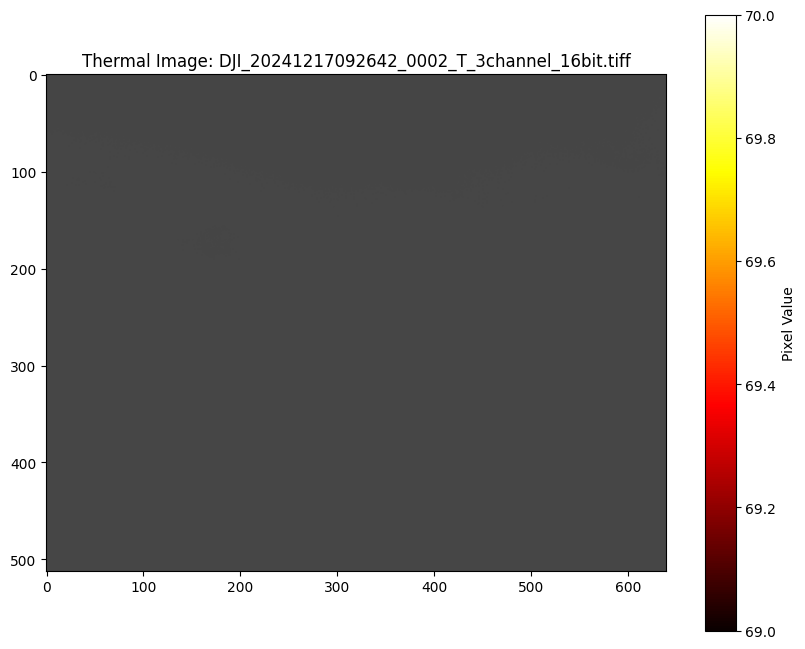

In [11]:
import matplotlib.pyplot as plt

# Get the first image from the processed directory
processed_files = [f for f in os.listdir(output_directory) if os.path.isfile(os.path.join(output_directory, f))]

if processed_files:
    # Get the first file
    test_file = processed_files[4]
    test_file_path = os.path.join(output_directory, test_file)
    
    # Load the image
    img = Image.open(test_file_path)
    
    # Convert to numpy array
    img_array = np.array(img)
    
    # Print image properties
    print(f"Image filename: {test_file}")
    print(f"Image mode: {img.mode}")
    print(f"Image size: {img.size}")
    print(f"Array shape: {img_array.shape}")
    print(f"Array data type: {img_array.dtype}")
    print(f"Min value: {np.min(img_array)}")
    print(f"Max value: {np.max(img_array)}")
    
    # Display the image
    plt.figure(figsize=(10, 8))
    plt.imshow(img_array, cmap='hot')
    plt.colorbar(label='Pixel Value')
    plt.title(f"Thermal Image: {test_file}")
    plt.show()
else:
    print("No processed files found in the output directory.")